In [63]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [45]:
paths = []
labels = []
for dirname, _, filenames in os.walk("C:/Users/pomes/Downloads/archive/TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [46]:
len(paths)

2800

In [47]:
paths[:5]

['C:/Users/pomes/Downloads/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/pomes/Downloads/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/pomes/Downloads/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/pomes/Downloads/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/pomes/Downloads/archive/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [48]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [49]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:/Users/pomes/Downloads/archive/TESS Toronto ...,angry
1,C:/Users/pomes/Downloads/archive/TESS Toronto ...,angry
2,C:/Users/pomes/Downloads/archive/TESS Toronto ...,angry
3,C:/Users/pomes/Downloads/archive/TESS Toronto ...,angry
4,C:/Users/pomes/Downloads/archive/TESS Toronto ...,angry


In [50]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

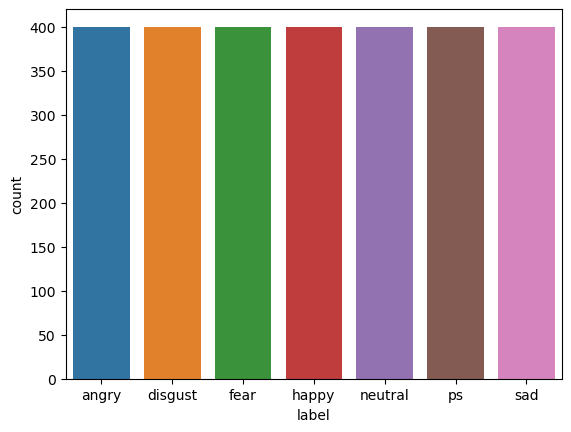

In [56]:
sns.countplot(data=df,x='label')

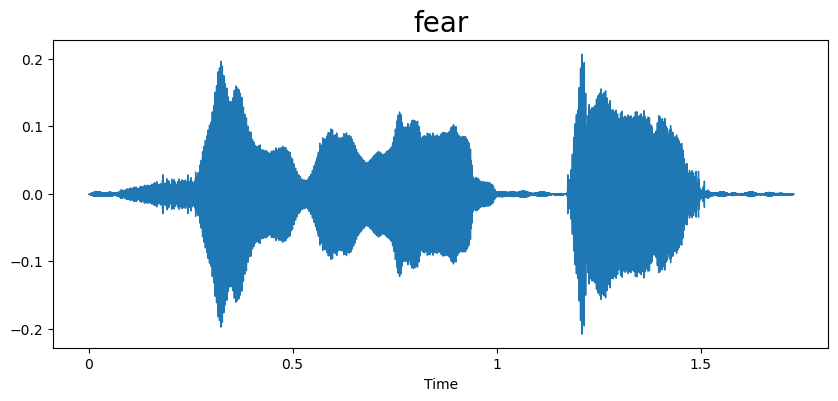

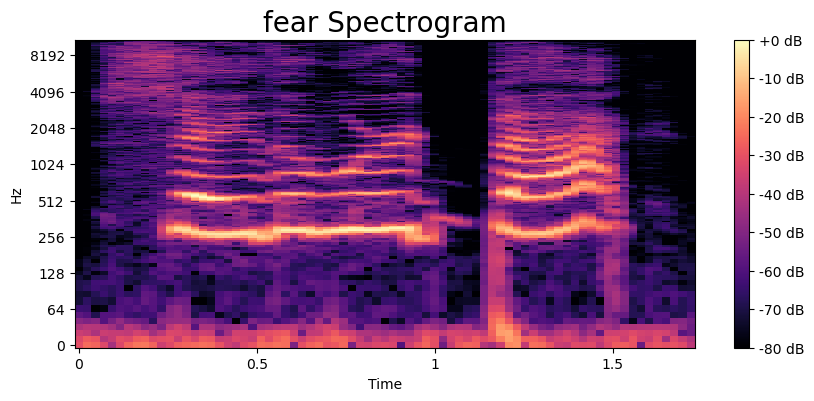

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

# Define emotion and load speech data
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

# Plot waveplot
plt.figure(figsize=(10,4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

# Plot spectrogram
plt.figure(figsize=(10,4))
plt.title(emotion + ' Spectrogram', size=20)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Play audio
Audio(path)


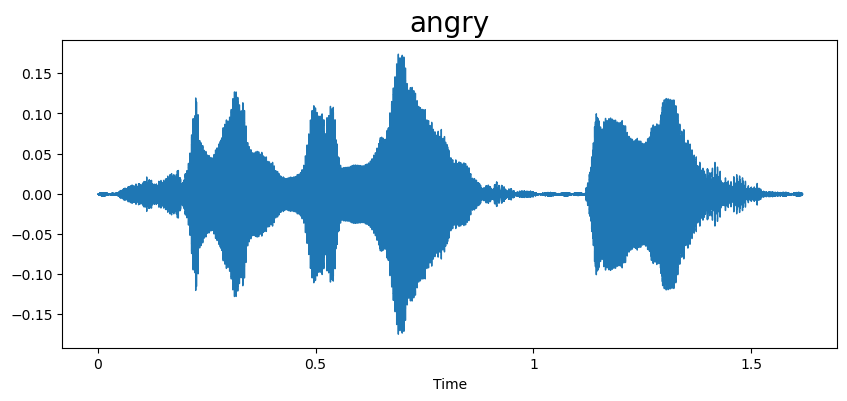

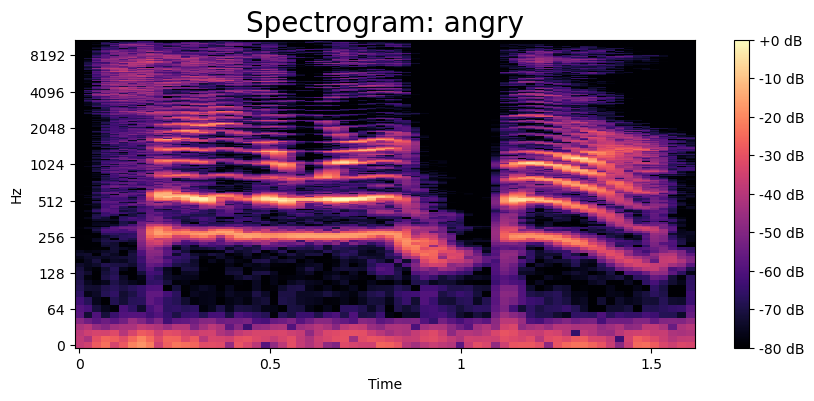

In [68]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Assuming df is your DataFrame containing speech data and labels

# Given emotion
emotion = 'angry'

# Assuming df has 'speech' and 'label' columns
path = np.array(df['speech'][df['label'] == emotion])[1]

# Load audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Waveform plot
plt.figure(figsize=(10, 4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

# Spectrogram
plt.figure(figsize=(10, 4))
plt.title('Spectrogram: ' + emotion, size=20)
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Audio playback
Audio(path)


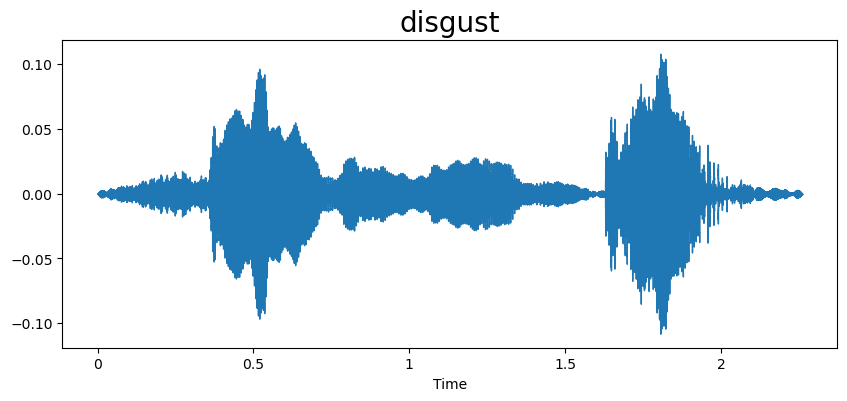

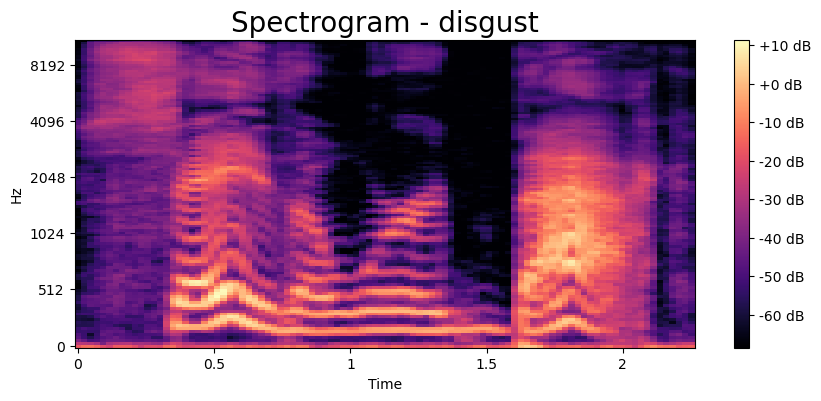

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

# Define the emotion and path
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Plot the waveplot using matplotlib
plt.figure(figsize=(10, 4))
plt.title(emotion, size=20)
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.title('Spectrogram - ' + emotion, size=20)
librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(y=data, sr=sampling_rate)), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Play the audio
Audio(path)


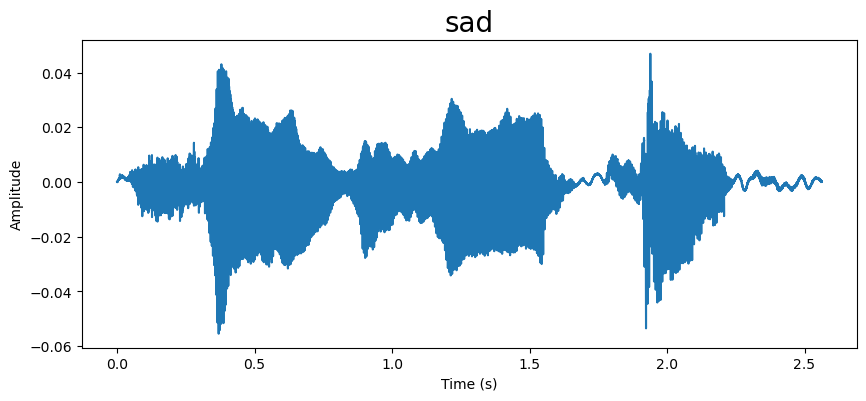

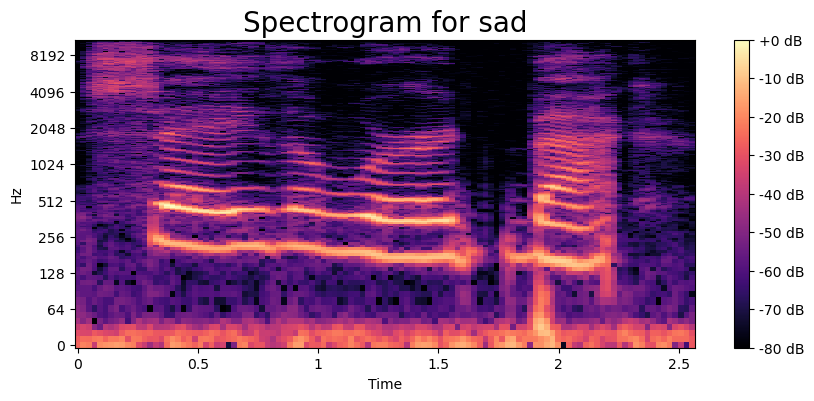

In [74]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(np.arange(len(data)) / sr, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Assuming df and emotion are defined

# Get the path for the first speech sample with the specified emotion
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Plot the waveplot
waveplot(data, sampling_rate, emotion)

# Display the spectrogram
plt.figure(figsize=(10, 4))
plt.title(f'Spectrogram for {emotion}', size=20)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Play the audio
Audio(path)


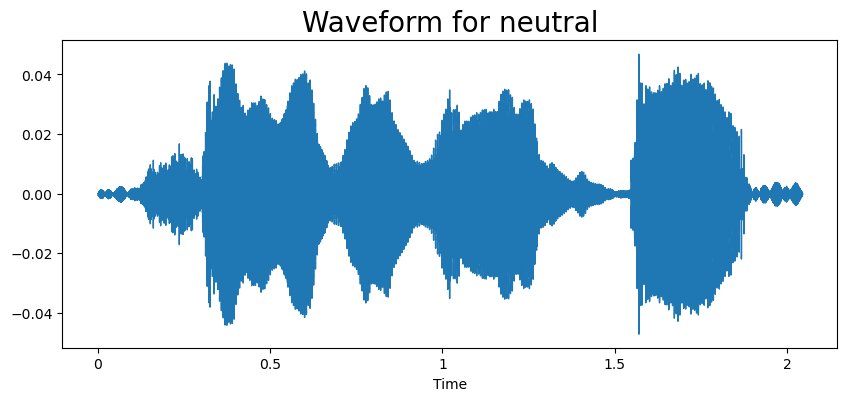

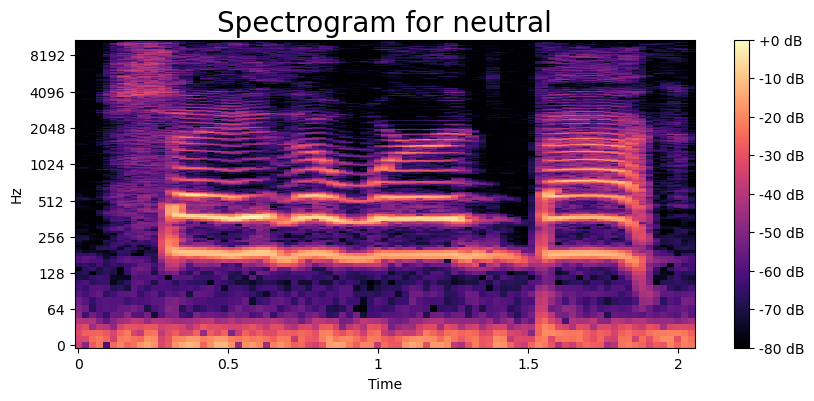

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

# Assuming df is a DataFrame containing 'speech' and 'label' columns

# Set emotion to 'neutral'
emotion = 'neutral'

# Get the path for the first instance of 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio data and sampling rate
data, sampling_rate = librosa.load(path)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.title(f'Waveform for {emotion}', size=20)
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.title(f'Spectrogram for {emotion}', size=20)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), y_axis='log', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.show()

# Display the audio
Audio(path)


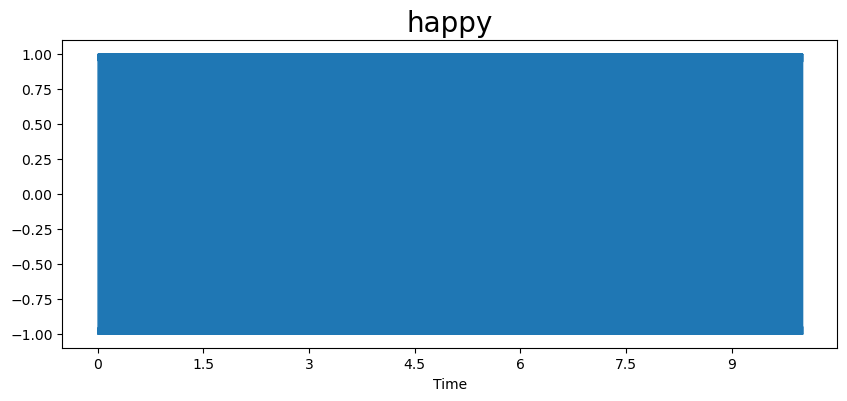

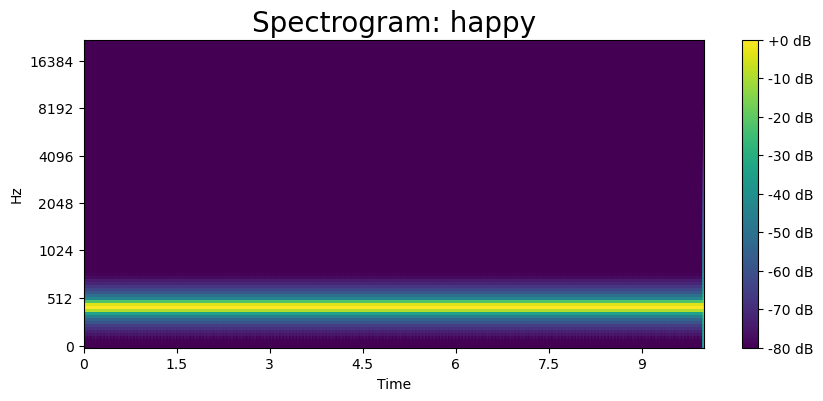

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

# Sample data and sampling rate for demonstration purposes
# Replace with your actual data and sampling rate
duration = 10  # Duration of the audio in seconds
sampling_rate = 44100  # Replace with your sampling rate

# Generate sample audio data
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
data = np.sin(2 * np.pi * 440.0 * t)  # Sample audio (440 Hz sine wave)

# Function to plot waveform
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# Function to plot spectrogram
def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title('Spectrogram: ' + emotion, size=20)
    S = librosa.feature.melspectrogram(y=data, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Example emotion (replace with your actual emotion)
emotion = 'happy'

# Plot waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(data, rate=sampling_rate)


In [79]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [80]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101603e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633800e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115908e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722581e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [81]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [82]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.124, 1.5550474, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092943, 8....
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20408, 36.96118, 15.014448, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [85]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [86]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [87]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [88]:
y = y.toarray()

In [89]:
y.shape

(2800, 7)

In [93]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [95]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 7s 117ms/step - loss: 1.1022 - accuracy: 0.6161 - val_loss: 1.2707 - val_accuracy: 0.2857
Epoch 2/50
35/35 [==============================] - 3s 84ms/step - loss: 0.4338 - accuracy: 0.8531 - val_loss: 0.3029 - val_accuracy: 0.8946
Epoch 3/50
35/35 [==============================] - 3s 85ms/step - loss: 0.2198 - accuracy: 0.9326 - val_loss: 0.1965 - val_accuracy: 0.9196
Epoch 4/50
35/35 [==============================] - 3s 86ms/step - loss: 0.1550 - accuracy: 0.9513 - val_loss: 0.0841 - val_accuracy: 0.9714
Epoch 5/50
35/35 [==============================] - 3s 86ms/step - loss: 0.0992 - accuracy: 0.9656 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 6/50
35/35 [==============================] - 3s 87ms/step - loss: 0.1145 - accuracy: 0.9670 - val_loss: 0.1555 - val_accuracy: 0.9571
Epoch 7/50
35/35 [==============================] - 3s 83ms/step - loss: 0.0883 - accuracy: 0.9750 - val_loss: 0.1262 - val_accuracy: 0.9607
Epoch 8/50
3

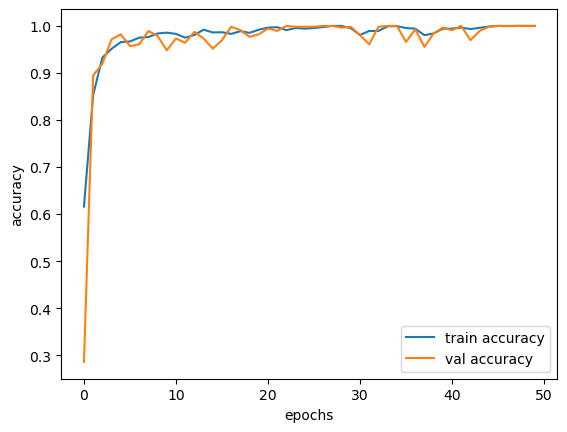

In [96]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

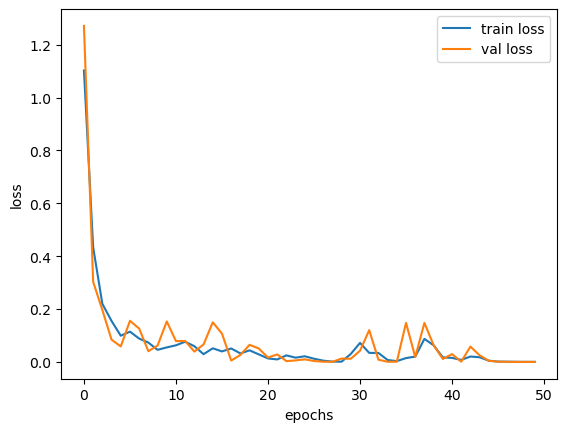

In [97]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()